# HERE IS THE CODE FOR THIS PROJECT

# Import Data

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

# Get the Data

In [6]:
data=pd.read_csv('PerthTemperatures.csv')

In [7]:
data.head()

,Year,Month,Day,Minimum temperature (Degree C),Maximum temperature (Degree C),Rainfall amount (millimetres),Quality
0,1944.0,6.0,3.0,11.0,22.3,0.0,N
1,1944.0,6.0,4.0,12.2,23.4,0.0,Y
2,1944.0,6.0,5.0,12.0,20.3,2.0,Y
3,1944.0,6.0,6.0,7.4,18.7,3.3,Y
4,1944.0,6.0,7.0,5.9,21.3,0.3,Y


In [8]:
data.isnull().sum()

Year                               1
Month                              1
Day                                1
Minimum temperature (Degree C)    76
Maximum temperature (Degree C)    31
Rainfall amount (millimetres)      0
Quality                           31
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.head()

,Year,Month,Day,Minimum temperature (Degree C),Maximum temperature (Degree C),Rainfall amount (millimetres),Quality
0,1944.0,6.0,3.0,11.0,22.3,0.0,N
1,1944.0,6.0,4.0,12.2,23.4,0.0,Y
2,1944.0,6.0,5.0,12.0,20.3,2.0,Y
3,1944.0,6.0,6.0,7.4,18.7,3.3,Y
4,1944.0,6.0,7.0,5.9,21.3,0.3,Y


In [11]:
data.size

192787

# Plottings

In [15]:
sns.set_style('darkgrid')

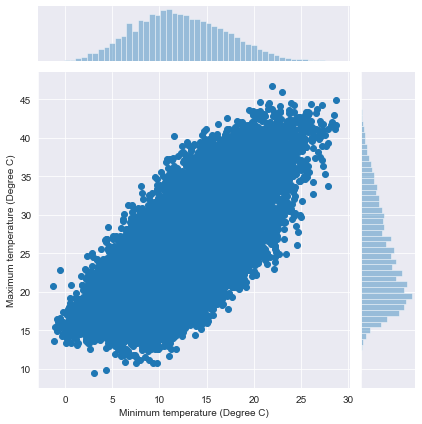

In [16]:
sns.jointplot(x='Minimum temperature (Degree C)',y='Maximum temperature (Degree C)',data=data,kind='scatter')

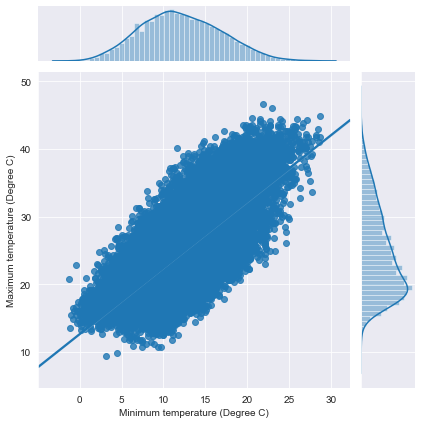

In [17]:
sns.jointplot(x='Minimum temperature (Degree C)',y='Maximum temperature (Degree C)',data=data,kind='reg')

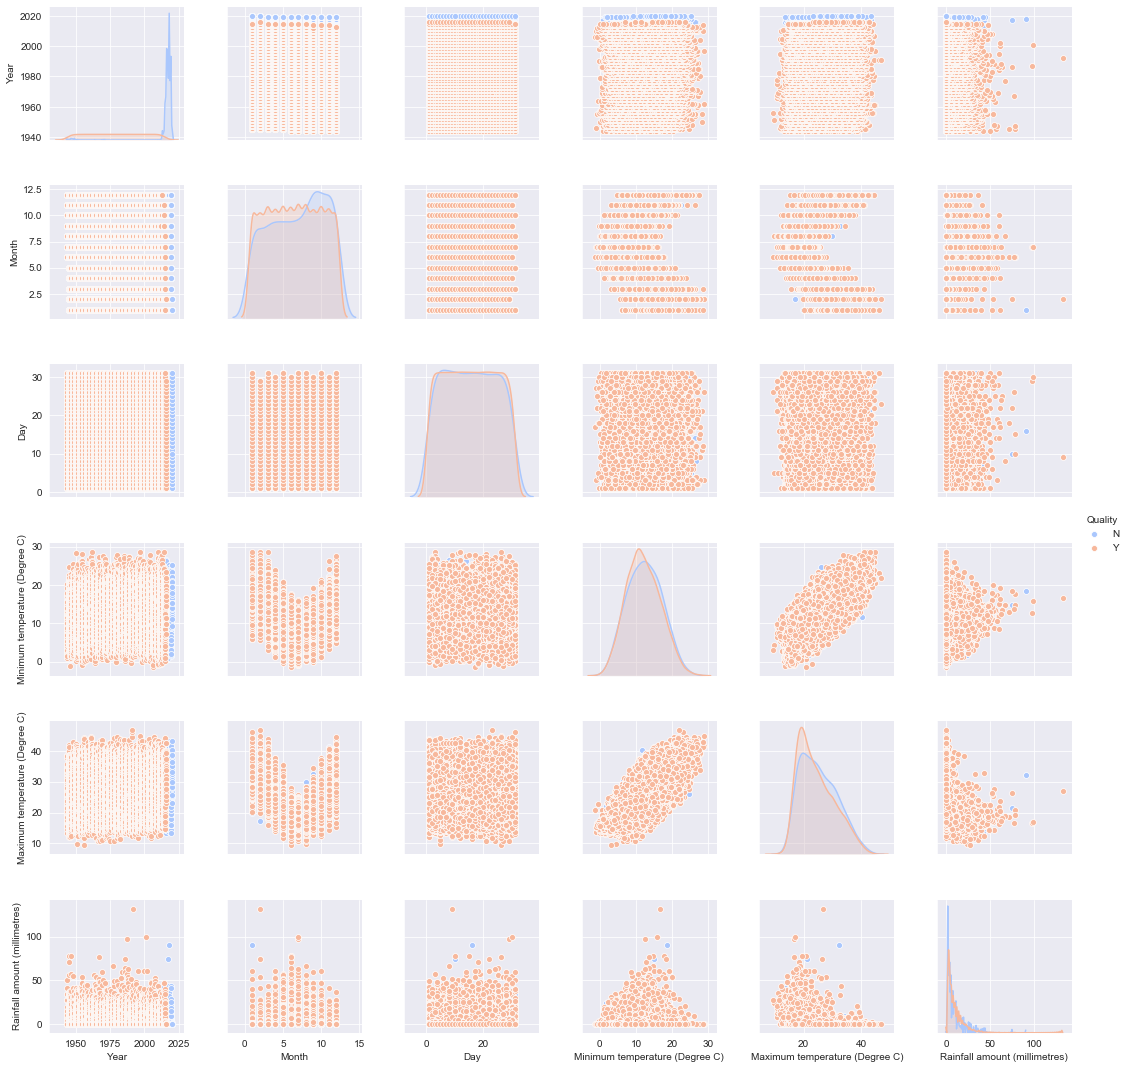

In [19]:
sns.pairplot(data,hue='Quality',palette='coolwarm')

# Scale the Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()

In [24]:
X=data[['Year','Month','Day','Minimum temperature (Degree C)','Maximum temperature (Degree C)']]
y=data['Rainfall amount (millimetres)']

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [27]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Train and Predict the Model

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfr=RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)

In [31]:
predictions = rfr.predict(X_test_scaled)

Text(0, 0.5, 'Predicted Y')

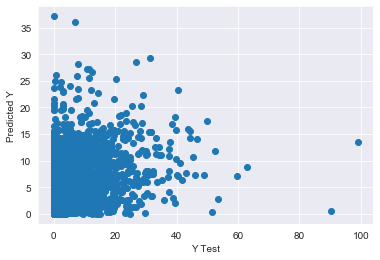

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.247152773743828
MSE: 26.477827040081323
RMSE: 5.145660991561854
